In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 

In [2]:
train = pd.read_csv('..\Datasets\Copy of churn-bigml-80.csv')
train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


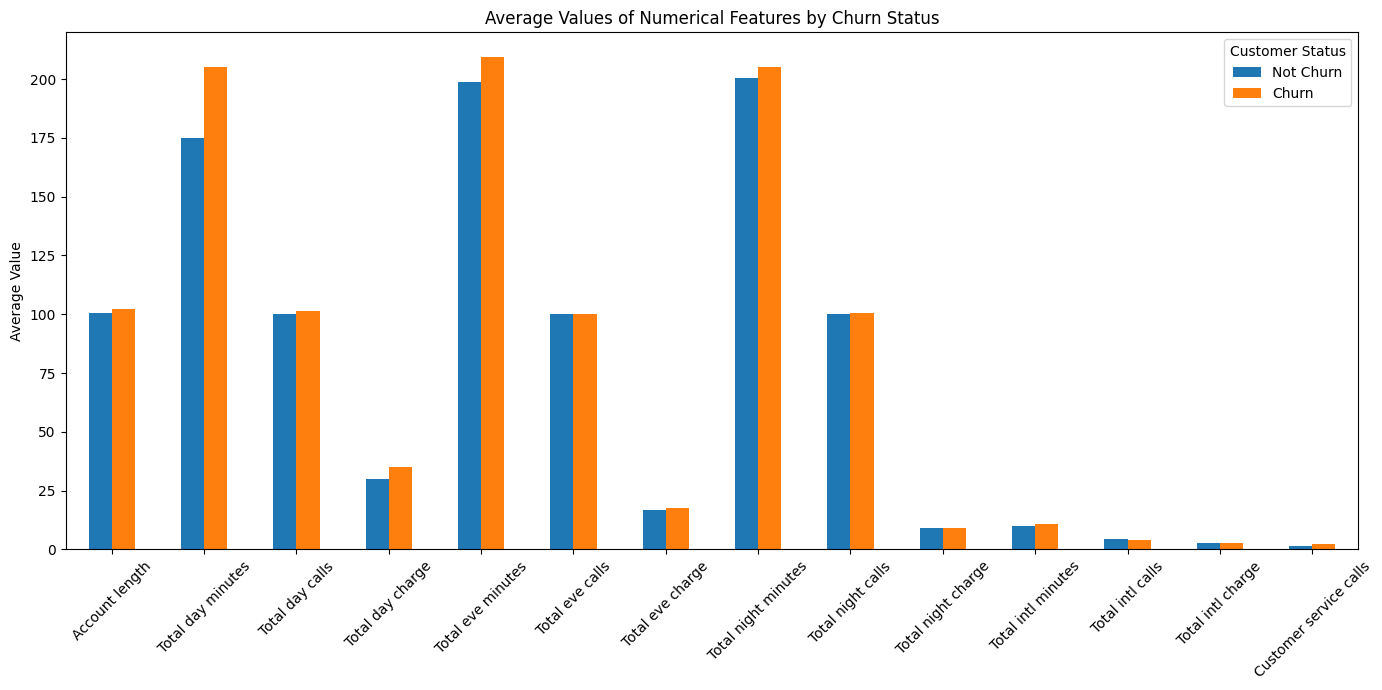

In [5]:
# Giả sử df là dataframe bạn đang dùng
numerical_features = [
    'Account length', 'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls'
]

# Tính giá trị trung bình theo nhóm Churn
grouped = train.groupby('Churn')[numerical_features].mean().T
grouped.columns = ['Not Churn', 'Churn']  # False -> Not Churn, True -> Churn

# Vẽ biểu đồ cột so sánh
grouped.plot(kind='bar', figsize=(14, 7))
plt.title('Average Values of Numerical Features by Churn Status')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()


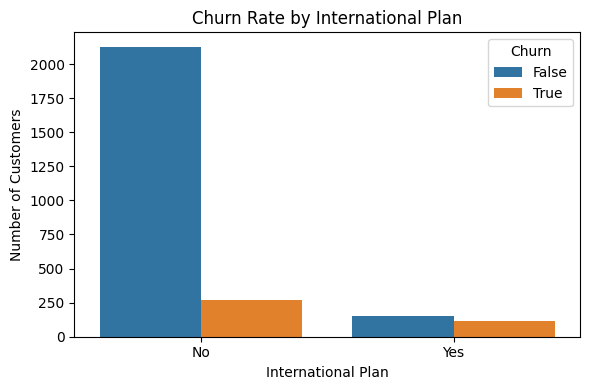

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='International plan', hue='Churn')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

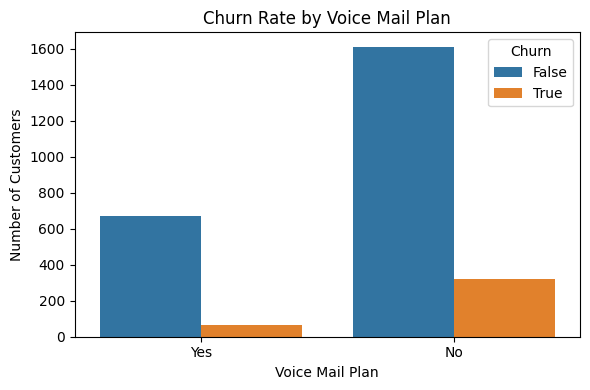

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Voice mail plan', hue='Churn')
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
train['Total charge'] = (
    train['Total day charge'] +
    train['Total eve charge'] +
    train['Total night charge'] +
    train['Total intl charge']
)

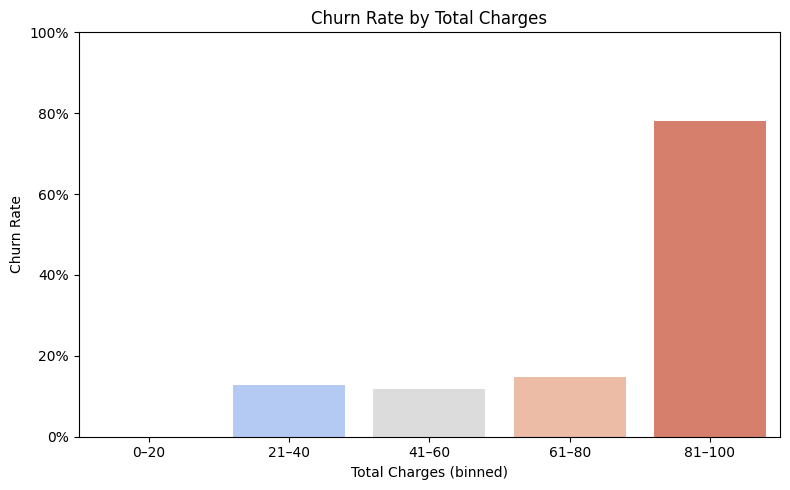

In [ ]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
train['Charge_bin'] = pd.cut(train['Total charge'], bins=bins, labels=labels, right=False)

churn_by_charge = train.groupby('Charge_bin')['Churn'].apply(lambda x: (x == True).mean()).reset_index()
churn_by_charge.columns = ['Charge_bin', 'Churn Rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=churn_by_charge, x='Charge_bin', y='Churn Rate', palette='coolwarm')
plt.title('Churn Rate by Total Charges')
plt.xlabel('Total Charges (binned)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()

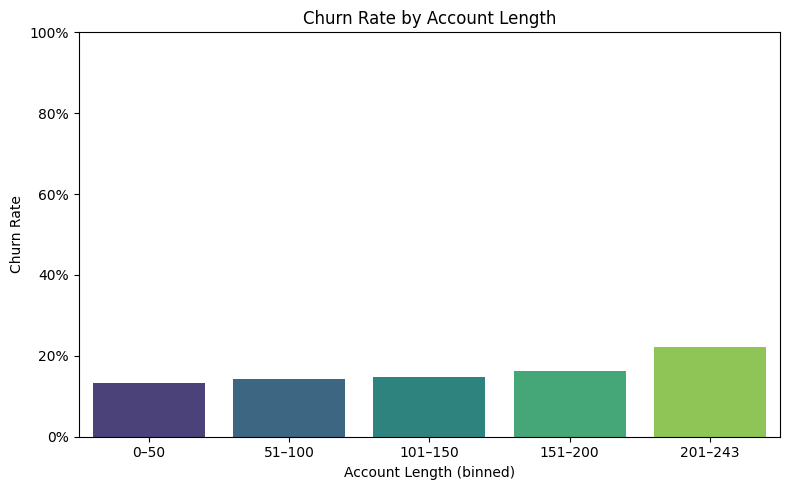

In [ ]:
max_val = train['Account length'].max() 
bins = [0, 50, 100, 150, 200, 250, max_val + 1]  
labels = ['0–50', '51–100', '101–150', '151–200', '201–243', '243+']

bins = [0, 50, 100, 150, 200, 243 + 1]
labels = ['0–50', '51–100', '101–150', '151–200', '201–243']

train['Account_bin'] = pd.cut(train['Account length'], bins=bins, labels=labels, right=False)

churn_by_bin = train.groupby('Account_bin')['Churn'].apply(lambda x: (x == True).mean()).reset_index()
churn_by_bin.columns = ['Account_bin', 'Churn Rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=churn_by_bin, x='Account_bin', y='Churn Rate', palette='viridis')
plt.title('Churn Rate by Account Length')
plt.xlabel('Account Length (binned)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


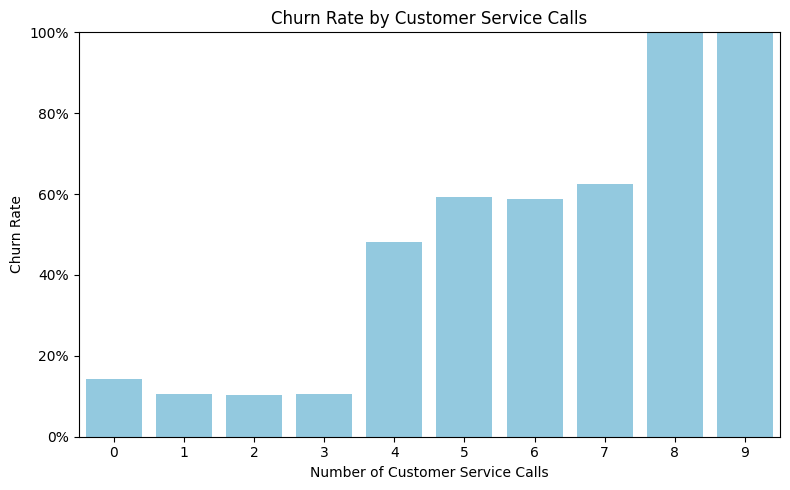

In [ ]:
churn_rate = train.groupby('Customer service calls')['Churn'].apply(lambda x: (x == True).mean()).reset_index()

churn_rate.columns = ['Customer service calls', 'Churn Rate']

plt.figure(figsize=(8, 5))
sns.barplot(data=churn_rate, x='Customer service calls', y='Churn Rate', color='skyblue')

plt.title('Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

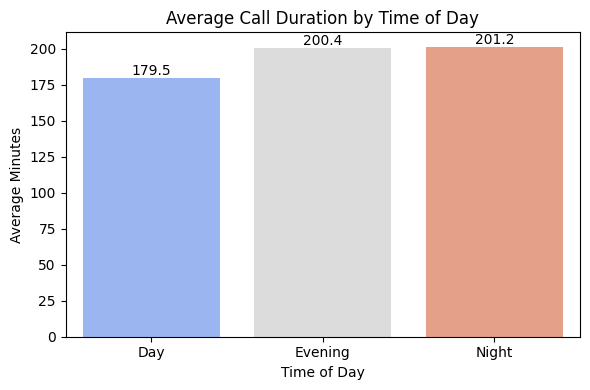

In [ ]:
avg_minutes = {
    'Day': train['Total day minutes'].mean(),
    'Evening': train['Total eve minutes'].mean(),
    'Night': train['Total night minutes'].mean()
}

x_labels = list(avg_minutes.keys())
y_values = list(avg_minutes.values())

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x_labels, y=y_values, palette='coolwarm')
plt.title('Average Call Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Minutes')

for i, v in enumerate(y_values):
    plt.text(i, v + 0.09, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

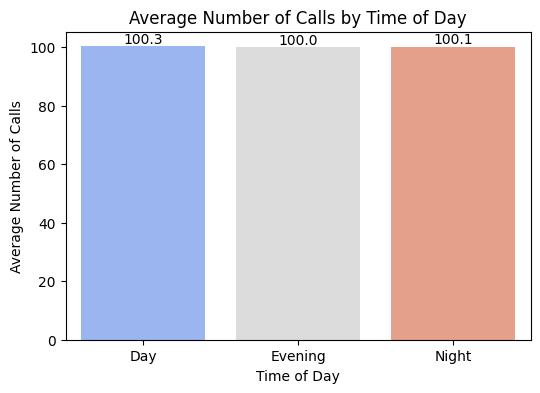

In [ ]:
avg_calls = {
    'Day': train['Total day calls'].mean(),
    'Evening': train['Total eve calls'].mean(),
    'Night': train['Total night calls'].mean()
}

x_labels = list(avg_calls.keys())
y_values = list(avg_calls.values())

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x_labels, y=y_values, palette='coolwarm')
plt.title('Average Number of Calls by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Calls')

for i, v in enumerate(y_values):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom')

plt.show()

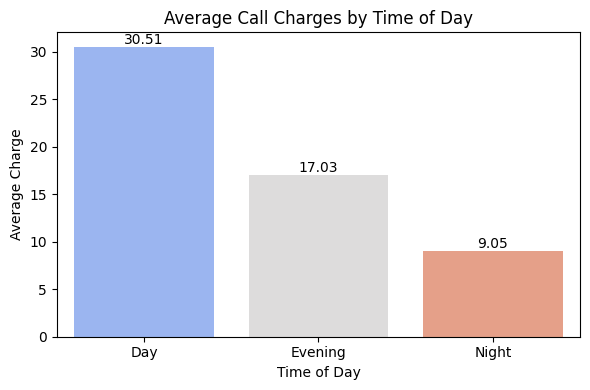

In [ ]:
avg_charge = {
    'Day': train['Total day charge'].mean(),
    'Evening': train['Total eve charge'].mean(),
    'Night': train['Total night charge'].mean()
}

x_labels = list(avg_charge.keys())
y_values = list(avg_charge.values())

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x_labels, y=y_values, palette='coolwarm')
plt.title('Average Call Charges by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Charge')

for i, v in enumerate(y_values):
    plt.text(i, v , f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Dù buổi tối và ban đêm có thời lượng gọi dài hơn, chi phí lại thấp hơn đáng kể.

In [ ]:
train[(train['Voice mail plan'] != 'Yes') & (train['Number vmail messages'] != 0)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Charge_bin,Account_bin


drop Voice mail plan vì hoàn toàn có thể suy ra từ Number vmail messages, không mang thêm thông tin mới cho mô hình học

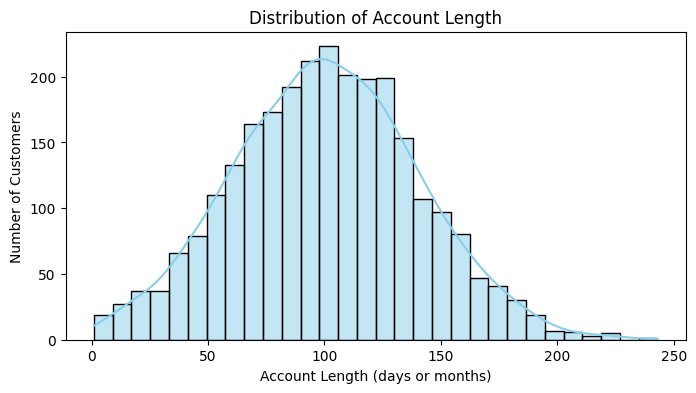

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Account length', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (days or months)')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
train['Area code'].unique()

array([415, 408, 510], dtype=int64)

In [ ]:
len(train['State'].unique())

51

có sự khác biệt trong state và area code 

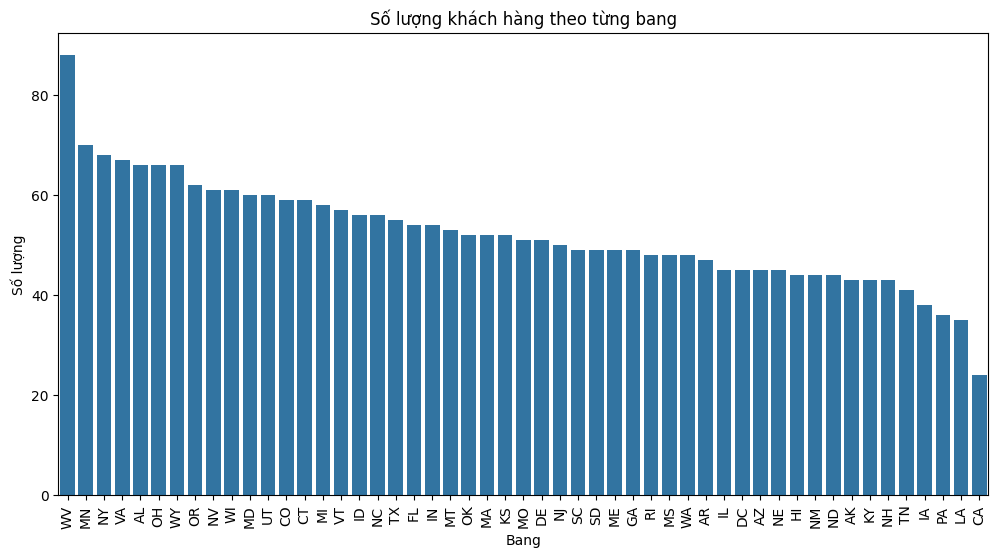

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x='State', order=train['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Số lượng khách hàng theo từng bang')
plt.xlabel('Bang')
plt.ylabel('Số lượng')
plt.show()

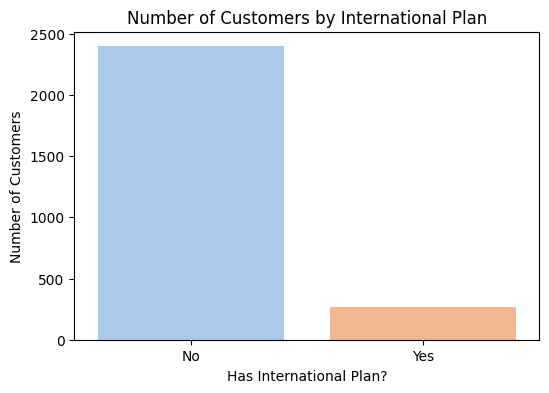

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='International plan', palette='pastel')
plt.title('Number of Customers by International Plan')
plt.xlabel('Has International Plan?')
plt.ylabel('Number of Customers')
plt.show()

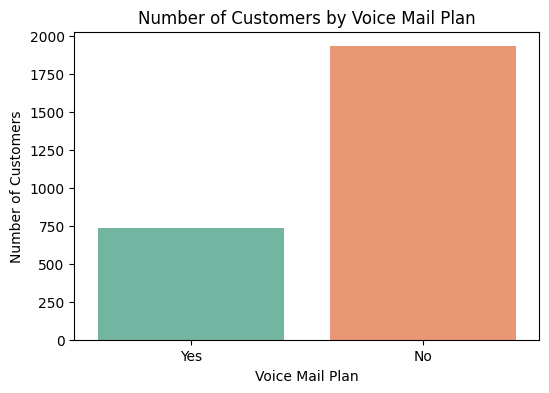

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Voice mail plan', palette='Set2')
plt.title('Number of Customers by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')
plt.show()

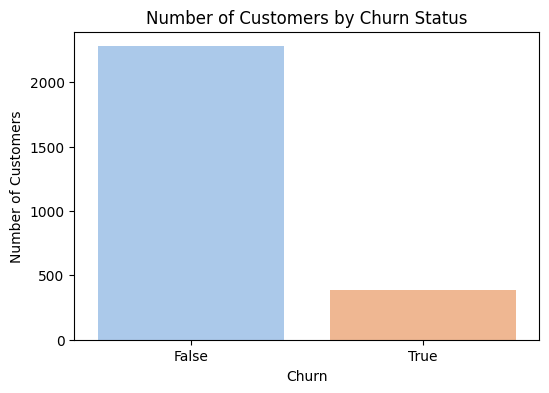

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Churn', palette='pastel')
plt.title('Number of Customers by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

imbalance

In [ ]:
train.drop(['Charge_bin', 'Account_bin', 'Total charge'], axis=1, inplace=True)

In [ ]:
train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
train.shape

(2666, 20)

In [ ]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
numeric_cols = train.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient="h")
plt.title("Boxplot kiểm tra outliers cho các biến số")
plt.tight_layout()
plt.show()

In [ ]:
test = pd.read_csv('..\Datasets\Copy of churn-bigml-20.csv')
test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
test.shape

(667, 20)

In [ ]:
bool(len(train.columns) == len(test.columns))

True

Chỉ để kiểm tra kỹ thuật: như định dạng dữ liệu, số lượng dòng, có null không, có cùng kiểu feature với train không.

In [ ]:
test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

Total charge) = sum của 3 phần

Logistic Regression

✅ Easy to implement and interpret

Inputs: All features, with categorical variables like 'State', 'International plan', 'Voice mail plan' encoded appropriately (e.g., label encoding or one-hot encoding)

Explains feature importance through the model’s coefficients

Useful as a baseline model

2. Decision Tree or Random Forest

✅ Can model non-linear relationships

✅ Native support for categorical features (after encoding)

Feature importance can be extracted using .feature_importances_, showing which variables most influence churn

Random Forest improves stability and reduces overfitting

3. Gradient Boosting Models (e.g., LightGBM or XGBoost)

✅ High accuracy and performance

Can handle numerical and categorical features (LightGBM supports categorical directly)

Feature importance available via gain or split metrics

Additionally, SHAP values can be used to explain both global and individual predictions in a human-interpretable way